In [ ]:
import kagglehub
import os

print("Downloading dataset...")
downloaded_path = kagglehub.dataset_download("rewa77/dataset-for-vegatables")
print(f"Dataset downloaded to: {downloaded_path}")

dir = "veg_dataset"
working_dir = os.path.join("/content", dir)

print(f"Copying files from {downloaded_path} to {working_dir}...")

# Copy dataset from downloaded path to working directory in /content
!cp -r "{downloaded_path}" "{working_dir}"


100%|██████████| 243M/243M [00:12<00:00, 20.3MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/rewa77/dataset-for-vegatables/versions/1
Copying files from /root/.cache/kagglehub/datasets/rewa77/dataset-for-vegatables/versions/1 to /content/veg_dataset...


In [ ]:
import kagglehub
import os

print("Downloading dataset...")
downloaded_path = kagglehub.dataset_download("kvnpatel/fruits-vegetable-detection-for-yolov4")

print(f"Dataset downloaded to: {downloaded_path}")

dir = "kvnpatel_dataset"
working_dir = os.path.join("/content", dir)

print(f"Copying files from {downloaded_path} to {working_dir}...")

# Copy dataset from downloaded path to working directory in /content
!cp -r "{downloaded_path}" "{working_dir}"

100%|██████████| 5.85G/5.85G [03:26<00:00, 30.4MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/kvnpatel/fruits-vegetable-detection-for-yolov4/versions/1
Copying files from /root/.cache/kagglehub/datasets/kvnpatel/fruits-vegetable-detection-for-yolov4/versions/1 to /content/kvnpatel_dataset...


In [ ]:
import os
import random
import shutil
import math

# original training image/label paths
original_train_dir = os.path.join(working_dir, "train")
original_img_dir = os.path.join(original_train_dir, "images")
original_lbl_dir = os.path.join(original_train_dir, "labels")

# directories for splitting the dataset
train_dir = "train_split"
valid_dir = "valid_split"
test_dir = "test_split"

# Output directory paths for train valid test
train_dir = os.path.join(working_dir, train_dir)
valid_dir = os.path.join(working_dir, valid_dir)
test_dir = os.path.join(working_dir, test_dir)



num_test_images = 10

# Train/Valid split ratio
valid_ratio = 0.20
random.seed(42)

# Get all images from directory
all_images = [f for f in os.listdir(original_img_dir)]

if not all_images:
    print(f"Error: No image files found in {original_img_dir}")
else:
    print(f"Found {len(all_images)} images in {original_img_dir}")

    # Shuffle images
    random.shuffle(all_images)

    # Allocate images for test
    test_images = all_images[:num_test_images] # First 10 test images
    remaining_images = all_images[num_test_images:] # Remaining images
    print(f"Allocated {len(test_images)} images for the test set.")
    print(f"{len(remaining_images)} images remaining for train/validation split.")


    # Calculate split size
    num_remaining = len(remaining_images)
    num_valid = math.ceil(num_remaining * valid_ratio)
    num_train = len(all_images) - num_valid
    train_images = remaining_images[:num_train]
    valid_images = remaining_images[num_train:]
    print(f"Splitting into {num_train} training and {num_valid} validation images.")

    # New directories for train, valid, test
    for dir_path in [train_dir, valid_dir, test_dir]:
        os.makedirs(os.path.join(dir_path, "images"), exist_ok=True)
        os.makedirs(os.path.join(dir_path, "labels"), exist_ok=True)
    print("Created new directories for train_split, valid_split, and test_split.")

    # Function to copy files from source to output destination.
    def copy_files(image_list, source_img_dir, source_lbl_dir, dest_dir):
        copied_count = 0
        print(f"Copying files to {dest_dir}...")
        img_dest = os.path.join(dest_dir, "images")
        lbl_dest = os.path.join(dest_dir, "labels")
        for img_filename in image_list:
            base_filename = os.path.splitext(img_filename)[0]
            lbl_filename = base_filename + ".txt"

            # Source paths
            src_img_path = os.path.join(source_img_dir, img_filename)
            src_lbl_path = os.path.join(source_lbl_dir, lbl_filename)

            # Destination paths
            dest_img_path = os.path.join(img_dest, img_filename)
            dest_lbl_path = os.path.join(lbl_dest, lbl_filename)

            # Copy image
            if os.path.exists(src_img_path):
                  shutil.copy2(src_img_path, dest_img_path)
                  copied_count +=1

            # Copy label
            if os.path.exists(src_lbl_path):
                shutil.copy2(src_lbl_path, dest_lbl_path)

        print(f"Copied {copied_count} images.")


    # Copy files to new train/valid/test directories
    copy_files(train_images, original_img_dir, original_lbl_dir, train_dir)
    copy_files(valid_images, original_img_dir, original_lbl_dir, valid_dir)
    copy_files(test_images, original_img_dir, original_lbl_dir, test_dir)

    print("Finished copying files.")
    # Check the destination directories and list images/labels count
    print(f"Training images: {len(os.listdir(os.path.join(train_dir, 'images')))}")
    print(f"Training labels: {len(os.listdir(os.path.join(train_dir, 'labels')))}")
    print(f"Validation images: {len(os.listdir(os.path.join(valid_dir, 'images')))}")
    print(f"Validation labels: {len(os.listdir(os.path.join(valid_dir, 'labels')))}")
    print(f"Test images: {len(os.listdir(os.path.join(test_dir, 'images')))}")
    print(f"Test labels: {len(os.listdir(os.path.join(test_dir, 'labels')))}")

Found 7952 images in /content/veg_dataset/train/images
Allocated 10 images for the test set.
7942 images remaining for train/validation split.
Splitting into 6363 training and 1589 validation images.
Created new directories for train_split, valid_split, and test_split.
Copying files to /content/veg_dataset/train_split...
Copied 6363 images.
Copying files to /content/veg_dataset/valid_split...
Copied 1579 images.
Copying files to /content/veg_dataset/test_split...
Copied 10 images.
Finished copying files.
Training images: 6363
Training labels: 6363
Validation images: 1579
Validation labels: 1579
Test images: 10
Test labels: 10


In [ ]:
# Load and display yaml contents
yaml_path = os.path.join(working_dir, "data.yaml")

print(f"Contents of {yaml_path}:")
!cat "{yaml_path}"

Contents of /content/veg_dataset/data.yaml:
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 26
names: ['avocado', 'beans', 'beet', 'bell pepper', 'broccoli', 'brus capusta', 'cabbage', 'carrot', 'cayliflower', 'celery', 'corn', 'cucumber', 'eggplant', 'fasol', 'garlic', 'hot pepper', 'onion', 'peas', 'potato', 'pumpkin', 'rediska', 'redka', 'salad', 'squash-patisson', 'tomato', 'vegetable marrow']

roboflow:
  workspace: test-on9hk
  project: vegetables-kacga
  version: 5
  license: CC BY 4.0
  url: https://universe.roboflow.com/test-on9hk/vegetables-kacga/dataset/5

In [ ]:
import os

final_yaml_content = """
path: /content/veg_dataset  # Dataset root directory
train: train_split/images   # Path to training images relative to 'path'
val: valid_split/images     # Path to validation images relative to 'path'
test: test_split/images     # Path to test images relative to 'path'

nc: 26
names: ['avocado', 'beans', 'beet', 'bell pepper', 'broccoli', 'brus capusta', 'cabbage', 'carrot', 'cayliflower', 'celery', 'corn', 'cucumber', 'eggplant', 'fasol', 'garlic', 'hot pepper', 'onion', 'peas', 'potato', 'pumpkin', 'rediska', 'redka', 'salad', 'squash-patisson', 'tomato', 'vegetable marrow']

# Roboflow section (optional metadata - can be kept or removed)
roboflow:
  workspace: test-on9hk
  project: vegetables-kacga
  version: 5
  license: CC BY 4.0
  url: https://universe.roboflow.com/test-on9hk/vegetables-kacga/dataset/5
"""

# Overwrite old yaml with new info
with open(yaml_path, 'w') as f:
    # removes whitespace
    f.write(final_yaml_content.strip())

# Verify
with open(yaml_path, 'r') as f:
    print(f.read())



path: /content/veg_dataset  # Dataset root directory
train: train_split/images   # Path to training images relative to 'path'
val: valid_split/images     # Path to validation images relative to 'path'
test: test_split/images     # Path to test images relative to 'path'

nc: 26
names: ['avocado', 'beans', 'beet', 'bell pepper', 'broccoli', 'brus capusta', 'cabbage', 'carrot', 'cayliflower', 'celery', 'corn', 'cucumber', 'eggplant', 'fasol', 'garlic', 'hot pepper', 'onion', 'peas', 'potato', 'pumpkin', 'rediska', 'redka', 'salad', 'squash-patisson', 'tomato', 'vegetable marrow']

# Roboflow section (optional metadata - can be kept or removed)
roboflow:
  workspace: test-on9hk
  project: vegetables-kacga
  version: 5
  license: CC BY 4.0
  url: https://universe.roboflow.com/test-on9hk/vegetables-kacga/dataset/5


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.0/973.0 kB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
# Test images
test_images = "/content/veg_dataset/test_split/images"

# Evaluate on test images
!yolo predict \
  model=yolov8n.pt \
  source="{test_images}" \
  save=True \
  device=0 \
  name="veg_yolov8n_test_predictions"
  # conf=0.4 # Conf threshold


Ultralytics 8.3.106 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/10 /content/veg_dataset/test_split/images/--------------------------30_jpg.rf.c7860da4476be469fe2c8077083d74f6.jpg: 640x640 (no detections), 7.8ms
image 2/10 /content/veg_dataset/test_split/images/------------------------69_jpg.rf.55870dd12a7e83a85cb52eb17420423f.jpg: 640x640 1 pizza, 7.9ms
image 3/10 /content/veg_dataset/test_split/images/------------------9_jpg.rf.1a355e31de1bf126ceb984e24b30c0a0.jpg: 640x640 1 frisbee, 10 bananas, 7.5ms
image 4/10 /content/veg_dataset/test_split/images/-----------------22_jpg.rf.7d182a3a7495fc183cf3517a26709afe.jpg: 640x640 1 banana, 7.2ms
image 5/10 /content/veg_dataset/test_split/images/-------------17_jpg.rf.ac046de0851e34a18d93afce03279784.jpg: 640x640 1 broccoli, 7.0ms
image 6/10 /content/veg_dataset/test_split/images/-------------50_jpg.rf.d3e4348889f5543bfdb5e45fabd24191

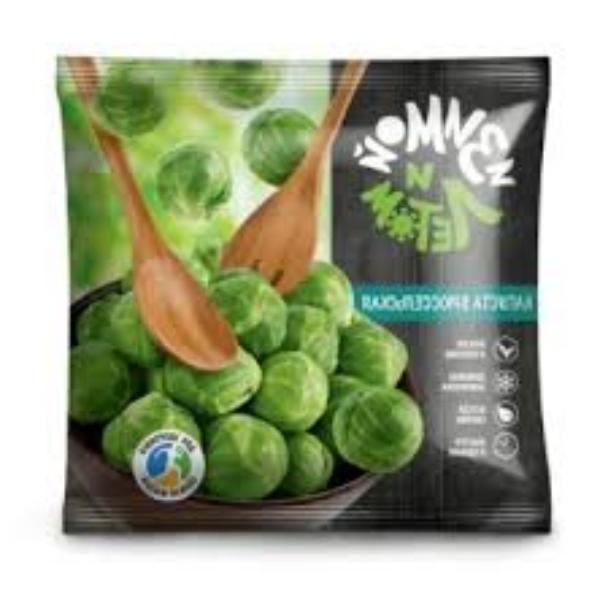

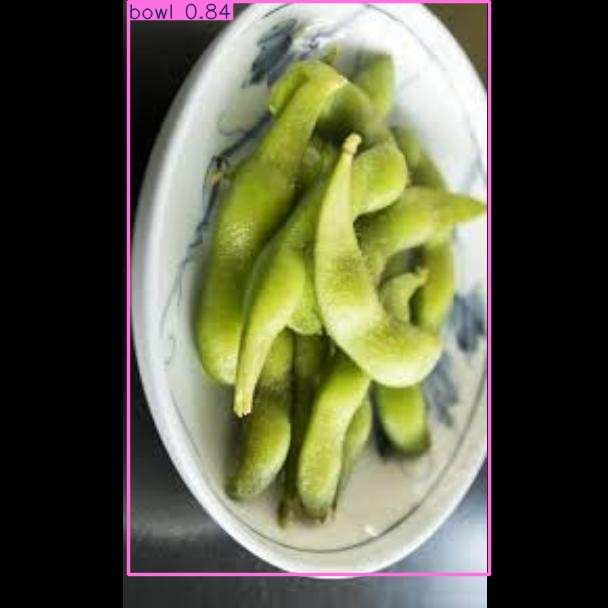

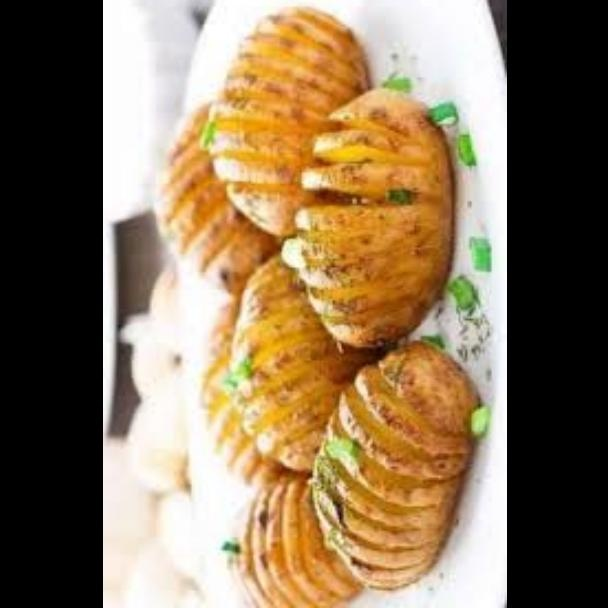

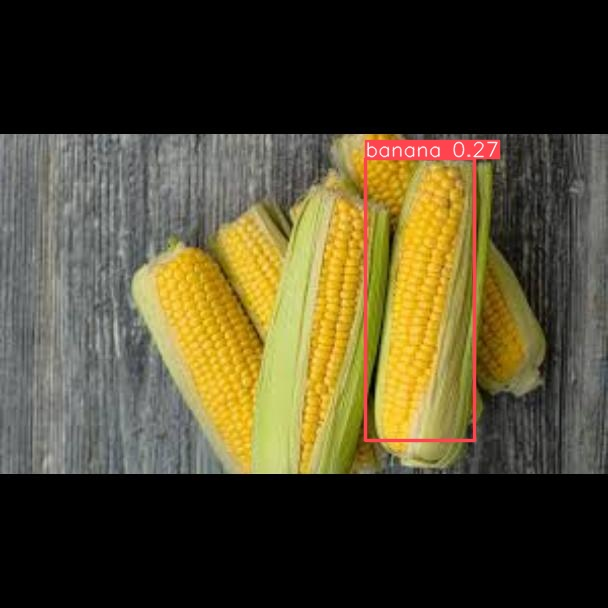

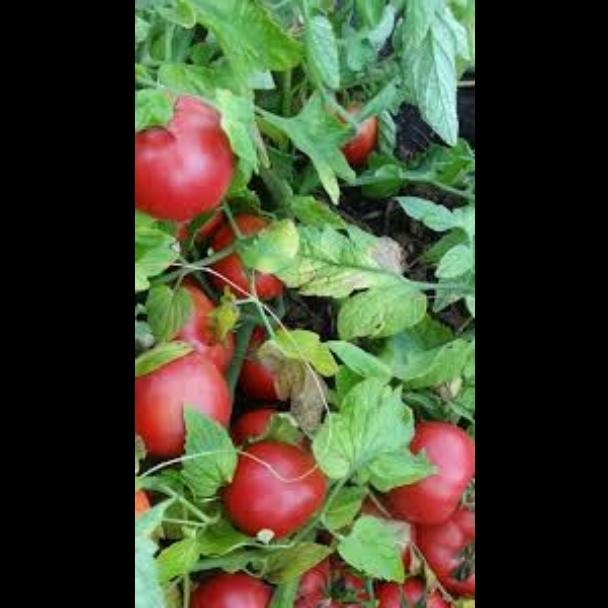

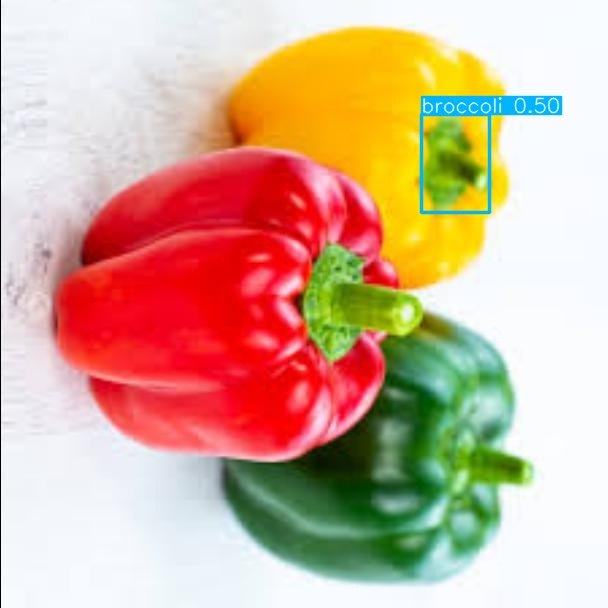

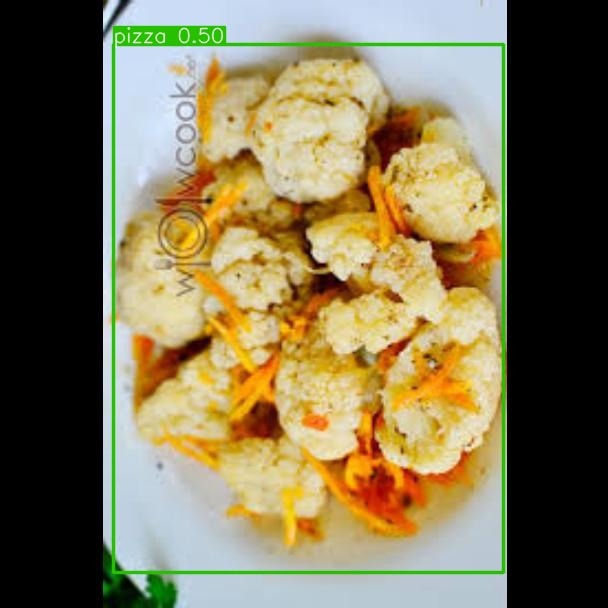

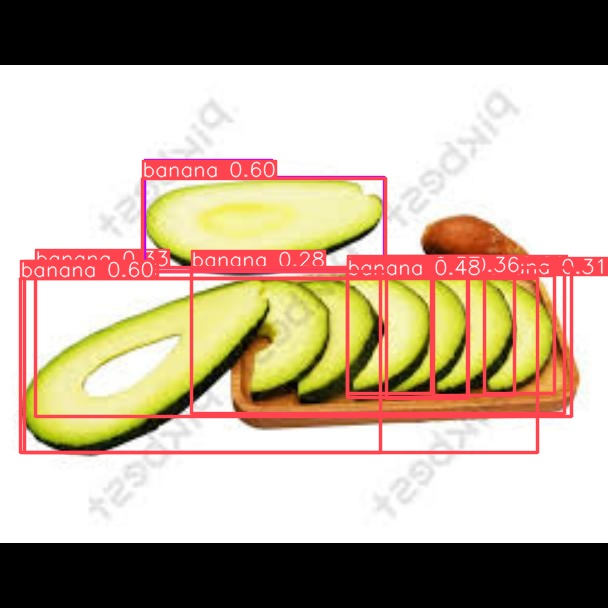

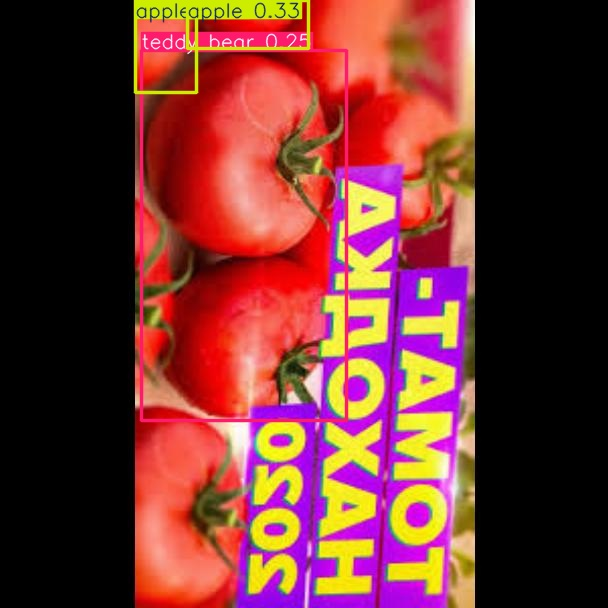

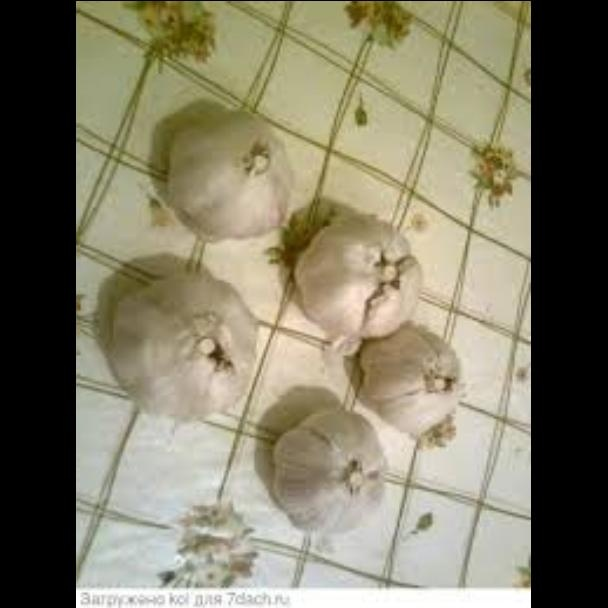

In [ ]:
from IPython.display import Image, display
import os
test_img_run = "/content/runs/detect/veg_yolov8n_test_predictions"
tested_images = [f for f in os.listdir(test_img_run)]

for img in tested_images:
  display(Image(filename=os.path.join(test_img_run, img)))

In [ ]:
!zip -r test_predictions_kaggle_transfer_real_photos.zip /content/runs/detect/veg_yolov8n_test_predictions

from google.colab import files
files.download('test_predictions_kaggle_transfer_real_photos.zip')

  adding: content/runs/detect/veg_yolov8n_test_predictions/ (stored 0%)
  adding: content/runs/detect/veg_yolov8n_test_predictions/20250409_212131.jpg (deflated 1%)
  adding: content/runs/detect/veg_yolov8n_test_predictions/20250409_212302.jpg (deflated 1%)
  adding: content/runs/detect/veg_yolov8n_test_predictions/20250409_212310.jpg (deflated 1%)
  adding: content/runs/detect/veg_yolov8n_test_predictions/20250409_211956.jpg (deflated 1%)
  adding: content/runs/detect/veg_yolov8n_test_predictions/20250409_212250.jpg (deflated 1%)
  adding: content/runs/detect/veg_yolov8n_test_predictions/20250409_212204.jpg (deflated 1%)
  adding: content/runs/detect/veg_yolov8n_test_predictions/20250409_212137.jpg (deflated 1%)
  adding: content/runs/detect/veg_yolov8n_test_predictions/20250409_212226.jpg (deflated 1%)
  adding: content/runs/detect/veg_yolov8n_test_predictions/20250409_212207.jpg (deflated 1%)
  adding: content/runs/detect/veg_yolov8n_test_predictions/20250409_212010.jpg (deflated 1%

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r runs.zip /content/runs
!zip -r veg_dataset.zip /content/veg_dataset

from google.colab import files
files.download('runs.zip')
files.download('veg_dataset.zip')

Streaming output truncated to the last 5000 lines.
  adding: content/veg_dataset/train_split/labels/--------------------------49_jpg.rf.4840e413832e465f3007f74d9014d43b.txt (deflated 32%)
  adding: content/veg_dataset/train_split/labels/------------37_jpg.rf.9e62849f3214ce85ebc8d27834c0e995.txt (deflated 69%)
  adding: content/veg_dataset/train_split/labels/--------------------18_jpg.rf.56bf07c4b51b7aca7cce80755626d36a.txt (deflated 37%)
  adding: content/veg_dataset/train_split/labels/------------13_jpg.rf.63a01770f394fc9cd3c41991b9e2388a.txt (deflated 29%)
  adding: content/veg_dataset/train_split/labels/---------------72_jpg.rf.1d9d53c0d177ecbe694738c91edd49db.txt (deflated 38%)
  adding: content/veg_dataset/train_split/labels/--------3_jpg.rf.4e9fd0ba5bd1bd0f3dd759e332b49e0d.txt (deflated 58%)
  adding: content/veg_dataset/train_split/labels/--------------58_jpg.rf.7b134338332b40e61e2444481a1bdd9a.txt (deflated 51%)
  adding: content/veg_dataset/train_split/labels/--------------56_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>